In [23]:
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter

In [24]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Perfect 1.csv')

# Create a list to hold all column lists
column_lists = [df[column].tolist() for column in df.columns]

In [25]:
x_data = column_lists[0]  # Example x-axis data
y_data = column_lists[1]  # Example y-axis data
s_data = column_lists[2]

In [26]:
def average_values(x_list, y_list):
    # Create a dictionary to store x as keys and list of corresponding y values as values
    x_to_ys = {}
    
    # Populate the dictionary
    for x, y in zip(x_list, y_list):
        if x in x_to_ys:
            x_to_ys[x].append(y)
        else:
            x_to_ys[x] = [y]
    
    # Calculate the average y for each x
    averaged_x = []
    averaged_y = []
    for x, ys in x_to_ys.items():
        averaged_x.append(x)
        averaged_y.append(sum(ys) / len(ys))
    
    return averaged_x, averaged_y

averaged_x, averaged_y = average_values(x_data, y_data)

averaged_s=[]


for val in averaged_x:
    for i in range(len(x_data)):
        if val==x_data[i]:
            averaged_s.append(s_data[i])
            break


In [27]:
def check_surrounding_equality(data):
    r=30
    n = len(data)
    result = [True] * n  # Initialize the result list with False

    for i in range(n):
        if i < r or i > n - (r+1):  # Not enough preceding or following values
            continue
        
        # Slice to get the window of 11 values centered at index i
        window = data[i-r:i+(r+1)]
        
        # Check if all elements in the window are the same as the center value
        if all(x == data[i] for x in window):
            result[i] = False
    
    return result

transition_s=check_surrounding_equality(averaged_s)

In [28]:
def calculate_slope(x, y):
    # Ensure that both lists have the same length
    if len(x) != len(y):
        raise ValueError("Lists x and y must have the same length")

    # List to store the slope values
    slopes = []

    # Calculate the slope between consecutive points
    for i in range(len(x) - 1):
        dx = x[i+1] - x[i]
        dy = y[i+1] - y[i]
        if dx == 0:
            raise ValueError("Delta x should not be zero.")
        slopes.append(dy / dx)

    return slopes

slopes = calculate_slope(averaged_x, averaged_y)
slopes.append(slopes[-1])

conditions_slope=[]
for i in range(len(slopes)):
    if slopes[i]>0.007 and not transition_s[i]:
        conditions_slope.append(True)
    else:
        conditions_slope.append(False)

In [29]:
second_variable_y = averaged_s

data = {
    'Time (min)': averaged_x,
    'Circumference (cm)': averaged_y,
    'Standing': second_variable_y,
    'Zone of Interest': conditions_slope
}

df = pd.DataFrame(data)

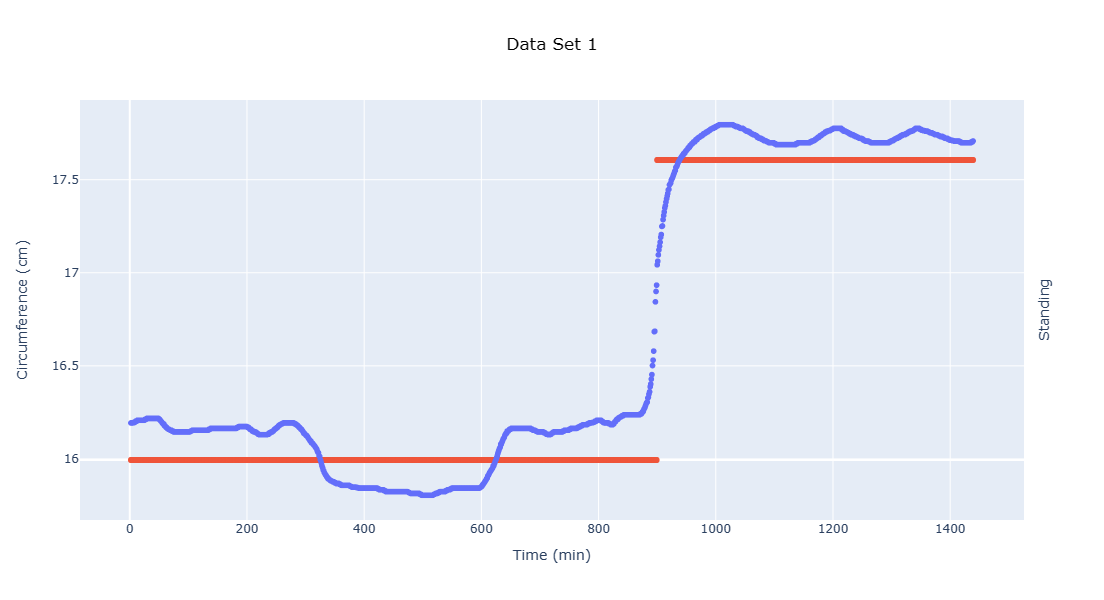

In [30]:
fig = px.scatter(x=averaged_x, y=averaged_y, labels={'x':'Time (min)', 'y':'Circumference (cm)'}, title='Test Data 1')
fig.add_scatter(x=df['Time (min)'], y=df['Standing'], 
                mode='markers', yaxis='y2', name='Standing', showlegend=False)
fig.update_layout({
    'yaxis2': {
        'title': 'Standing',
        'overlaying': 'y',
        'side': 'right',
        'range': [0-0.2, 1+0.2],
        'showgrid': False,
        'showticklabels': False
    },
    'title': {'text': 'Data Set 1', 'x':0.5, 'xanchor': 'center', 'font': {'color': 'black'}},
})

fig.update_layout(width=1000, height=600)
fig.show()

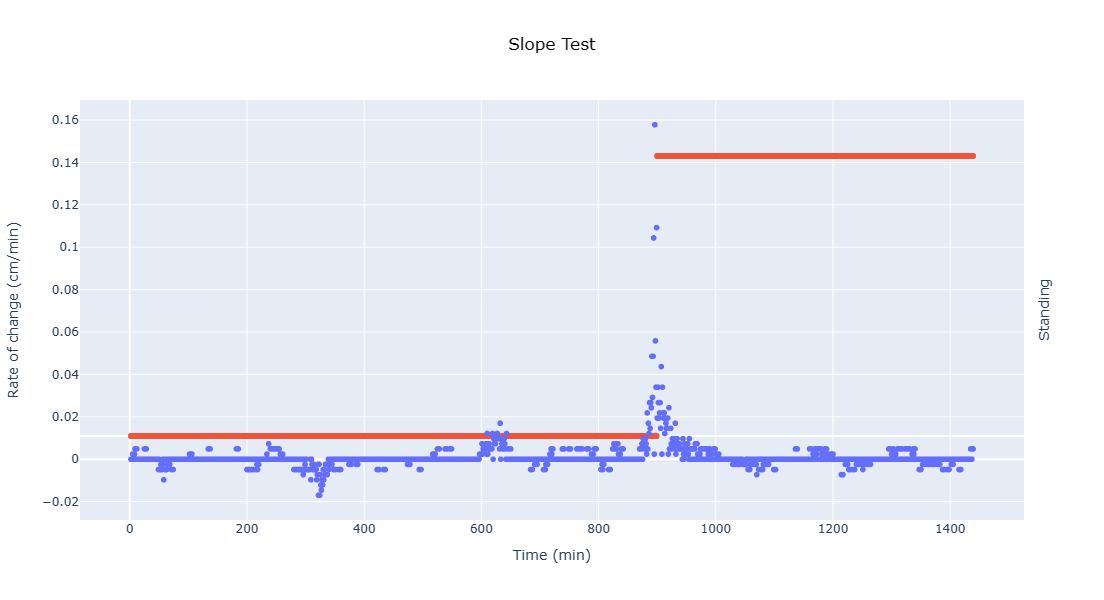

In [31]:
fig = px.scatter(x=averaged_x, y=slopes, labels={'x':'Time (min)', 'y':'Rate of change (cm/min)'}, title='Slope Data')
fig.add_scatter(x=df['Time (min)'], y=df['Standing'], 
                mode='markers', yaxis='y2', name='Standing', showlegend=False)
fig.update_layout({
    'yaxis2': {
        'title': 'Standing',
        'overlaying': 'y',
        'side': 'right',
        'range': [0-0.3, 1+0.2],
        'showgrid': False,
        'showticklabels': False
    },
    'title': {'text': 'Slope Test', 'x':0.5, 'xanchor': 'center', 'font': {'color': 'black'}},
})
fig.update_layout(width=1000, height=600)
fig.show()


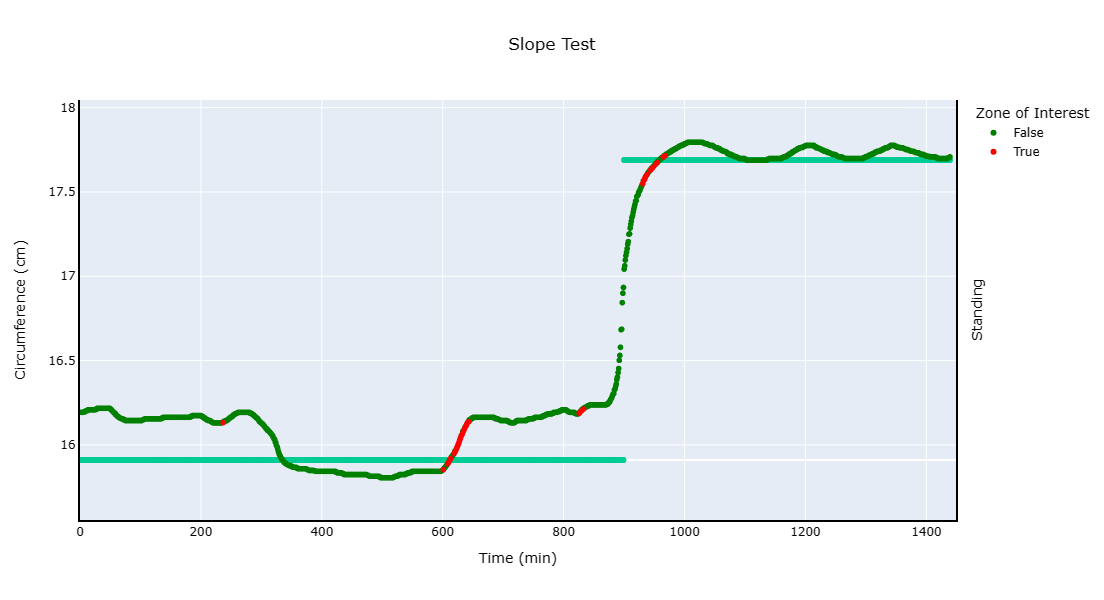

In [32]:
import plotly.express as px
import pandas as pd

# Sample data setup
# Example x values
# Example y values for the first plot
second_variable_y = averaged_s  # Example y values for the second plot
# Conditions for color

data = {
    'Time (min)': averaged_x,
    'Circumference (cm)': averaged_y,
    'Standing': second_variable_y,
    'Zone of Interest': conditions_slope
}

df = pd.DataFrame(data)

# Creating the scatter plot for the first variable
fig = px.scatter(df, 
                 x='Time (min)', 
                 y='Circumference (cm)', 
                 color='Zone of Interest',  # This assigns a color based on the 'Zone of Interest' column
                 title='Scatter Plot Example',
                 color_discrete_map={True: 'red', False: 'green'})  # Mapping True to red and False to green

# Adding a scatter plot for the second variable
fig.add_scatter(x=df['Time (min)'], y=df['Standing'], 
                mode='markers', yaxis='y2', name='Standing', showlegend=False)

# Update layout for background color and axes properties
fig.update_layout({
    'xaxis': {
        'range': [0, max(averaged_x) + 10],  # Set the starting point of x-axis at 0
        'tickcolor': 'black',  # Tick marks color
        'linecolor': 'black',  # Axis line color
        'title_font': {'color': 'black'},  # Axis title color
        'tickfont': {'color': 'black'},  # Tick labels color
    },
    'yaxis': {
        'range': [min(averaged_y) - 0.25, max(averaged_y) + 0.25],  # Start y-axis at min(y_values) - 1
        'tickcolor': 'black',  # Tick marks color
        'linecolor': 'black',  # Axis line color
        'title_font': {'color': 'black'},  # Axis title color
        'tickfont': {'color': 'black'},  # Tick labels color
    },
    'yaxis2': {
        'title': 'Standing',
        'overlaying': 'y',
        'side': 'right',
        'range': [0-0.2, 1+0.2],
        'showgrid': False,
        'showticklabels': False
    },
    'title': {'text': 'Slope Test', 'x':0.5, 'xanchor': 'center', 'font': {'color': 'black'}},
})

# Update axes and tick colors for better visibility against black background
fig.update_xaxes(tickcolor='black', linecolor='black', title_font=dict(color='black'), linewidth=2)
fig.update_yaxes(tickcolor='black', linecolor='black', title_font=dict(color='black'), linewidth=2)
fig.update_layout(legend_title_font={'color': 'black'}, legend_font={'color': 'black'})

fig.update_layout(width=1000, height=600)

fig.show()


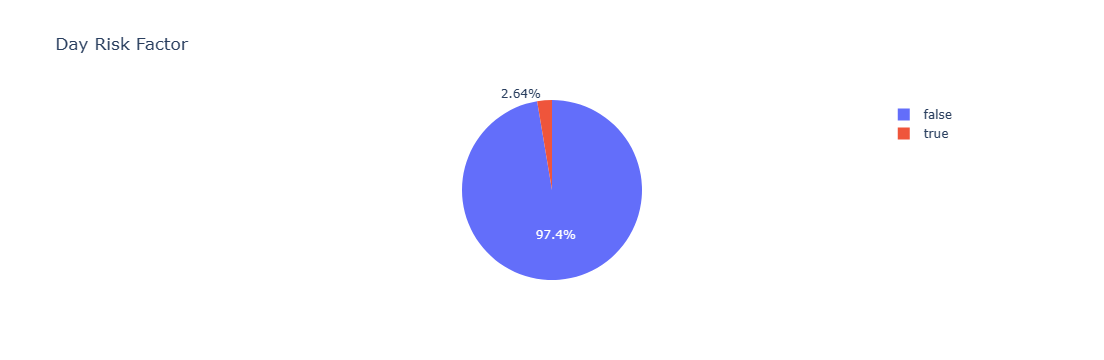

In [33]:
# Count True and False occurrences
counts = Counter(conditions_slope)

# Create a pie chart
fig = px.pie(names=list(counts.keys()), values=list(counts.values()),
             title='Day Risk Factor',
             color_discrete_map={True: 'red', False: 'green'})

# Show the pie chart
fig.show()